In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']


In [2]:
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [3]:
# Simple Text Pre-processing
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus


C:\Users\Sm\Anaconda3\lib\site-packages\sklearn\feature_extraction\dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [4]:
# creating word2vec reperentation for the text
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model (1 for skip gram)

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

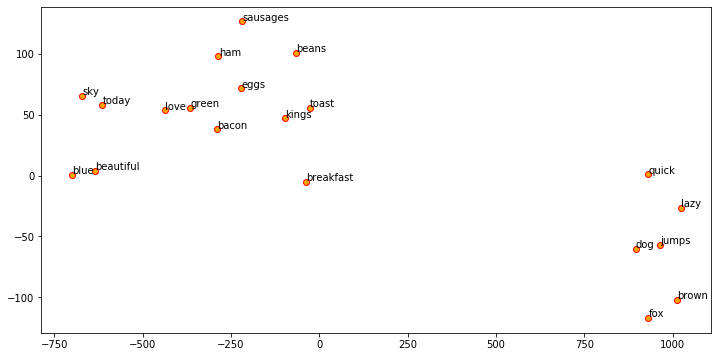

In [6]:
# reviewing them on tsne mappings to see the symantic relation
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [7]:
w2v_model.wv['sky']

array([ 0.63092256, -0.01888729, -0.02352005, -0.54506904, -0.10616253,
       -0.92768395, -0.20777248,  1.059833  ,  0.21716015,  1.7205151 ,
       -0.9742867 , -0.15705733, -0.16725127, -0.43012127, -0.5645665 ],
      dtype=float32)

In [8]:
w2v_model.wv['sky'].shape

(15,)

In [13]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df
xx=pd.DataFrame(vec_df)
xx


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,0.630923,-0.018887,-0.023520,-0.545069,-0.106163,-0.927684,-0.207772,1.059833,0.217160,1.720515,-0.974287,-0.157057,-0.167251,-0.430121,-0.564566
blue,0.383506,0.409814,0.035126,-0.388005,-0.094579,-0.608832,-0.293863,0.662176,-0.236363,1.069601,-0.707967,-0.272260,-0.321178,-0.511941,-0.140934
beautiful,0.547227,0.018239,0.245261,-0.551346,-0.181497,-0.673197,-0.346239,1.006356,0.202843,1.501082,-0.997042,-0.080838,0.004671,-0.600857,-0.489552
quick,0.840458,0.872575,-0.214215,0.328964,-0.857331,-0.362929,-0.073793,0.985753,-0.694588,0.277106,-0.635936,-1.223812,-0.419552,-0.357798,0.660218
brown,0.824761,0.929725,-0.055485,0.206864,-0.930521,-0.836652,-0.383073,0.447643,-0.577756,0.421213,-0.527249,-1.430138,-0.489700,-0.188260,0.504040
fox,0.985125,0.844710,-0.247014,0.201802,-0.830977,-0.670746,-0.093123,0.978974,-0.758998,0.155561,-0.522473,-1.240231,-0.639366,-0.121806,0.479652
lazy,1.061402,0.704679,-0.153406,0.306820,-0.642596,-0.687809,-0.448770,0.598139,-0.476558,0.433344,-0.616691,-1.379484,-0.531862,-0.016777,0.896351
dog,0.767674,0.914438,-0.056063,0.373911,-0.835320,-0.659783,-0.312194,0.914689,-0.704002,0.259834,-0.389000,-1.236664,-0.598172,-0.303310,0.460891
love,0.547070,0.011551,0.047165,-0.033540,-0.175652,-0.422899,0.082574,0.592738,0.122525,0.530021,-0.710084,0.682140,0.401528,0.054445,-0.668289
sausages,0.918646,0.528460,0.269648,0.647895,-0.530170,-0.540673,-0.077290,0.125000,0.118575,-0.036177,-1.027184,0.709922,1.015246,0.298595,-0.602880


In [14]:
#Looking at term semantic similarity¶
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df



,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,kings,breakfast,toast,beans,green,today
sky,1.000000,0.920619,0.981354,0.405162,0.430372,0.417375,0.418684,0.412072,0.715868,0.293151,0.324208,0.306736,0.350574,0.317179,0.197508,0.117323,0.133976,0.196987,0.479858,0.981529
blue,0.920619,1.000000,0.919605,0.616211,0.640412,0.615874,0.608727,0.632283,0.534196,0.205171,0.208412,0.201227,0.196568,0.545254,0.094350,0.047358,0.054699,0.104610,0.366654,0.925216
beautiful,0.981354,0.919605,1.000000,0.398450,0.410873,0.387167,0.392046,0.397974,0.724275,0.331444,0.371531,0.353593,0.365548,0.301471,0.196714,0.140953,0.140509,0.208272,0.534303,0.978102
quick,0.405162,0.616211,0.398450,1.000000,0.940591,0.977949,0.941212,0.975764,0.088884,0.156828,0.114858,0.179763,0.115576,0.971845,0.224164,0.261989,0.253241,0.224223,0.079611,0.403810
brown,0.430372,0.640412,0.410873,0.940591,1.000000,0.953702,0.966475,0.968942,0.048566,0.163690,0.150090,0.144129,0.147174,0.975123,0.202451,0.231795,0.229735,0.185190,0.059529,0.394643
fox,0.417375,0.615874,0.387167,0.977949,0.953702,1.000000,0.947309,0.982897,0.105907,0.154296,0.094457,0.143846,0.119485,0.977569,0.220404,0.257534,0.249534,0.215038,0.035455,0.410499
lazy,0.418684,0.608727,0.392046,0.941212,0.966475,0.947309,1.000000,0.946361,0.033640,0.135881,0.115367,0.137050,0.126470,0.967444,0.203588,0.233950,0.222480,0.189867,0.036074,0.382317
dog,0.412072,0.632283,0.397974,0.975764,0.968942,0.982897,0.946361,1.000000,0.065319,0.137412,0.105230,0.146280,0.106445,0.979585,0.200330,0.232084,0.224769,0.187185,0.054813,0.396384
love,0.715868,0.534196,0.724275,0.088884,0.048566,0.105907,0.033640,0.065319,1.000000,0.768875,0.709567,0.731567,0.778000,0.012913,0.657145,0.599788,0.610340,0.679403,0.836546,0.752484
sausages,0.293151,0.205171,0.331444,0.156828,0.163690,0.154296,0.135881,0.137412,0.768875,1.000000,0.944734,0.938181,0.966182,0.176388,0.923189,0.937884,0.931509,0.947800,0.890582,0.315713


In [15]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky           [today, beautiful, blue]
blue           [today, sky, beautiful]
beautiful           [sky, today, blue]
quick                [fox, dog, jumps]
brown               [jumps, dog, lazy]
fox                [dog, quick, jumps]
lazy               [jumps, brown, fox]
dog                [fox, jumps, quick]
love           [green, eggs, sausages]
sausages            [eggs, beans, ham]
ham            [eggs, bacon, sausages]
bacon               [ham, beans, eggs]
eggs            [sausages, ham, bacon]
jumps                [dog, fox, brown]
kings        [beans, toast, breakfast]
breakfast        [toast, beans, kings]
toast        [beans, kings, breakfast]
beans        [toast, kings, breakfast]
green           [bacon, ham, sausages]
today           [sky, beautiful, blue]
dtype: object

In [18]:
# Fast text Model
from gensim.models.fasttext import FastText
# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, size=feature_size, 
                     window=window_context, min_count = min_word_count,
                     sg=sg, sample=sample, iter=5000)
ft_model


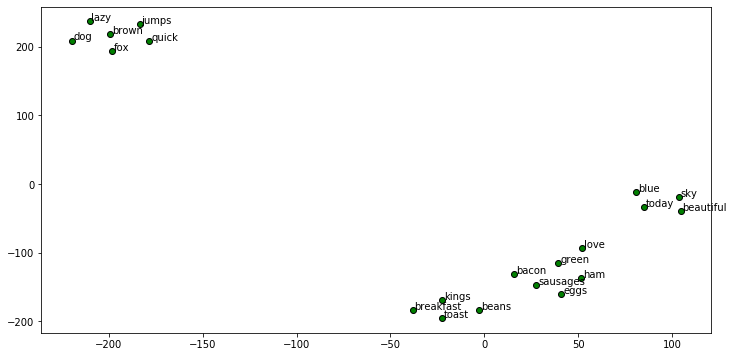

In [19]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index2word
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [20]:
ft_model.wv['sky'], ft_model.wv['sky'].shape

(array([ 0.27079892, -0.39113262, -0.49594226,  0.255143  ,  0.18303026,
        -0.24593699,  0.84503   , -0.41181976, -0.3296957 ,  0.94616044,
         0.24709892,  0.7863575 ,  0.7190639 ,  0.7775002 ,  1.1469386 ],
       dtype=float32),
 (15,))

In [22]:
# Finding the relation
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))


0.39445448
0.9686756


In [23]:
# Document level  Embedding
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [24]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.220118,-0.308461,-0.332238,0.193748,0.239751,-0.248183,0.782164,-0.248481,-0.290144,0.817937,0.190397,0.722770,0.637678,0.644710,1.109186
1,0.117959,-0.363161,-0.395676,0.159819,0.069982,-0.167333,0.636784,-0.258099,-0.227030,0.711286,0.152677,0.717916,0.610696,0.600255,0.906561
2,-0.304210,-0.299774,0.319866,0.251547,0.342884,-0.731748,1.406077,1.107810,-0.449130,-0.247008,-0.557522,0.281974,0.264800,0.136931,0.883745
3,-0.800193,-0.614154,-1.269738,-0.136457,-0.784633,-0.224420,-0.319386,0.410767,-0.200775,-0.116124,-0.702469,0.924703,0.562567,0.576574,0.166413
4,-0.538640,-0.550209,-1.009607,-0.075190,-0.651239,-0.030523,-0.182997,0.154799,-0.062557,0.114614,-0.434665,0.824393,0.588414,0.557862,0.245379
5,-0.207857,-0.278569,0.254843,0.236517,0.347379,-0.642694,1.310674,0.915766,-0.413250,-0.102376,-0.434403,0.336438,0.314264,0.187184,0.925678
6,0.237379,-0.326990,-0.366968,0.208009,0.223559,-0.246144,0.787469,-0.308826,-0.306877,0.858726,0.227687,0.756648,0.660822,0.665229,1.115617
7,-0.300424,-0.302790,0.321008,0.251875,0.354357,-0.747706,1.427131,1.083771,-0.458525,-0.220118,-0.546157,0.284001,0.270000,0.133297,0.896234


In [25]:
# Document Clustering

from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(ft_doc_features)

cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, 
                              columns=['ClusterLabel'])

pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,2
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,1
4,"I love green eggs, ham, sausages and bacon!",food,1
5,The brown fox is quick and the blue dog is lazy!,animals,2
6,The sky is very blue and the sky is very beautiful today,weather,0
7,The dog is lazy but the brown fox is quick!,animals,2


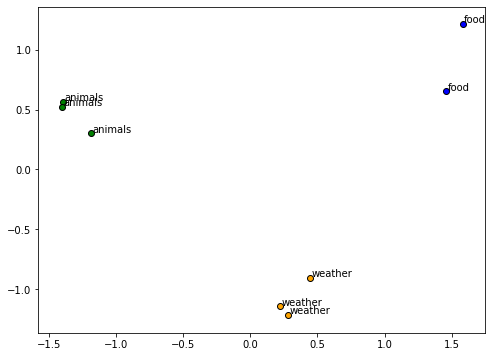

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(ft_doc_features)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-2, y+1e-2), xytext=(0, 0), 
                 textcoords='offset points')